In [1]:
from keras.datasets import mnist

2024-06-27 22:27:50.904050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 22:27:50.904106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 22:27:50.905673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 22:27:50.914158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 22:27:51.949671: W tensorflow/compiler/tf2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import classification_report

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train_encoded = X_train.reshape(X_train.shape[0], 784)
X_test_encoded = X_test.reshape(X_test.shape[0], 784)

In [7]:
df = pd.DataFrame(X_train_encoded)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth=None)

In [34]:
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(X_train_encoded)
y_pred_ = dt.predict(X_test_encoded)

In [36]:
print("for train")
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

for train


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,5923.0,6742.0,5958.0,6131.0,5842.0,5421.0,5918.0,6265.0,5851.0,5949.0,1.0,60000.0,60000.0


In [37]:
print("for test")
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

for test


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.910269,0.958627,0.866864,0.821023,0.875632,0.832200,0.903846,0.917577,0.826087,0.849654,0.8775,0.876178,0.877720
recall,0.931633,0.959471,0.851744,0.858416,0.881874,0.822870,0.883090,0.898833,0.819302,0.851338,0.8775,0.875857,0.877500
f1-score,0.920827,0.959049,0.859238,0.839303,0.878742,0.827508,0.893347,0.908108,0.822680,0.850495,0.8775,0.875930,0.877522
support,980.000000,1135.000000,1032.000000,1010.000000,982.000000,892.000000,958.000000,1028.000000,974.000000,1009.000000,0.8775,10000.000000,10000.000000


<Axes: >

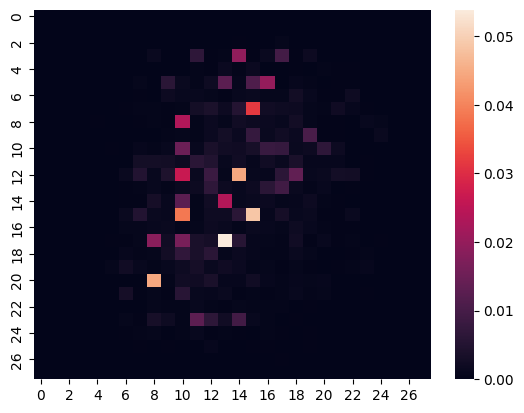

In [57]:
sns.heatmap(dt.feature_importances_.reshape(28, 28))

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [47]:
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=5)

In [48]:
y_pred = rf.predict(X_train_encoded)
y_pred_ = rf.predict(X_test_encoded)

In [49]:
print("for train")
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

for train


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.912404,0.834977,0.896539,0.797884,0.873333,0.952668,0.900347,0.873653,0.850577,0.746671,0.85785,0.863905,0.862563
recall,0.963701,0.979383,0.843572,0.836405,0.829682,0.642317,0.920581,0.892897,0.793881,0.838796,0.85785,0.854122,0.857850
f1-score,0.937351,0.901433,0.869249,0.816691,0.850948,0.767298,0.910352,0.883170,0.821252,0.790057,0.85785,0.854780,0.856200
support,5923.000000,6742.000000,5958.000000,6131.000000,5842.000000,5421.000000,5918.000000,6265.000000,5851.000000,5949.000000,0.85785,60000.000000,60000.000000


In [50]:
print("for train")
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

for train


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.901777,0.866873,0.896373,0.808232,0.872247,0.942373,0.884458,0.871183,0.846154,0.772085,0.8616,0.866175,0.865223
recall,0.983673,0.986784,0.838178,0.855446,0.806517,0.623318,0.902923,0.888132,0.824435,0.866204,0.8616,0.857561,0.861600
f1-score,0.940947,0.922950,0.866299,0.831169,0.838095,0.750337,0.893595,0.879576,0.835153,0.816441,0.8616,0.857456,0.859298
support,980.000000,1135.000000,1032.000000,1010.000000,982.000000,892.000000,958.000000,1028.000000,974.000000,1009.000000,0.8616,10000.000000,10000.000000


<Axes: >

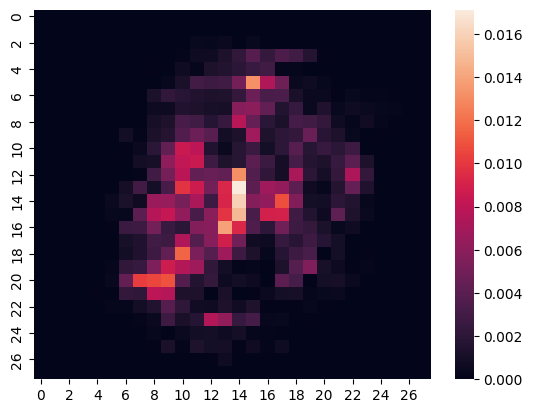

In [55]:
sns.heatmap(rf.feature_importances_.reshape(28, 28))